In [1]:
using DataFrames

using Plots
using JLD2

using Distributions
using StatsBase
using IterTools
using EmpiricalBayes
using KernelDensity
using LaTeXStrings
using RCall
using FileIO
using Query

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [2]:
pgfplots()

Plots.PGFPlotsBackend()

In [2]:
settings = 19
k_max=16
nreps = 25
nreps_total = k_max*nreps
nmethods=3

3

In [32]:
res_list = readdir("sim_res/base_sim_Jan10_v2/dfs");
res_list = string.("sim_res/base_sim_Jan10_v2/dfs/", res_list);

In [33]:
res_list

48-element Array{String,1}:
 "sim_res/base_sim_Jan10_v2/dfs/df_1_1.jld2"
 "sim_res/base_sim_Jan10_v2/dfs/df_1_2.jld2"
 "sim_res/base_sim_Jan10_v2/dfs/df_1_3.jld2"
 "sim_res/base_sim_Jan10_v2/dfs/df_1_4.jld2"
 "sim_res/base_sim_Jan10_v2/dfs/df_1_5.jld2"
 "sim_res/base_sim_Jan10_v2/dfs/df_1_6.jld2"
 "sim_res/base_sim_Jan10_v2/dfs/df_2_1.jld2"
 "sim_res/base_sim_Jan10_v2/dfs/df_2_2.jld2"
 "sim_res/base_sim_Jan10_v2/dfs/df_2_3.jld2"
 "sim_res/base_sim_Jan10_v2/dfs/df_2_4.jld2"
 "sim_res/base_sim_Jan10_v2/dfs/df_2_5.jld2"
 "sim_res/base_sim_Jan10_v2/dfs/df_2_6.jld2"
 "sim_res/base_sim_Jan10_v2/dfs/df_3_1.jld2"
 ⋮                                          
 "sim_res/base_sim_Jan10_v2/dfs/df_7_1.jld2"
 "sim_res/base_sim_Jan10_v2/dfs/df_7_2.jld2"
 "sim_res/base_sim_Jan10_v2/dfs/df_7_3.jld2"
 "sim_res/base_sim_Jan10_v2/dfs/df_7_4.jld2"
 "sim_res/base_sim_Jan10_v2/dfs/df_7_5.jld2"
 "sim_res/base_sim_Jan10_v2/dfs/df_7_6.jld2"
 "sim_res/base_sim_Jan10_v2/dfs/df_8_1.jld2"
 "sim_res/base_sim_Jan10_v2

In [34]:
df1 = FileIO.load(res_list[1],"my_df");
for file in res_list[2:end]
 append!(df1, FileIO.load(file,"my_df"));
end

In [35]:
sum(df1[:ci_right])

Inf

In [36]:
@rput df1;


In [37]:
R"saveRDS(df1, file='df1.Rds')"

RObject{NilSxp}
NULL


In [38]:
R"head(df1)"
R"nrow(df1)"

RObject{IntSxp}
[1] 1711200


In [103]:
combs[2]

Dict{Symbol,Any} with 4 entries:
  :m      => 10000
  :σ      => 0.2
  :dist   => MixtureModel{Normal{Float64}}(K = 2)…
  :target => PosteriorTarget{PosteriorMeanNumerator}[PosteriorTarget{PosteriorM…

In [39]:
R"library(tidyverse)"
R"summ_df <- filter(df1, !is.infinite(ci_right))"
R"nrow(summ_df)"


RObject{IntSxp}
[1] 1708893


In [40]:
R"""
df1 <- mutate(df1, true_theta = ifelse(abs(true_theta) <= 10^(-10), 0.0, true_theta))
summ_df <- group_by(df1, setting_idx, method, dof, x, true_theta) %>%
           summarize(n=n(),coverage = mean( (true_theta >= ci_left) & (true_theta <= ci_right)),
                     ci_left = mean(ci_left),
                     ci_right = mean(ci_right), 
                     mean_est = mean(est),
                     bias= mean(est - true_theta),
                     sd = sd(est),
                     mse = bias^2 + sd^2
                     )
"""

RObject{VecSxp}
# A tibble: 3,200 x 13
# Groups:   setting_idx, method, dof, x [?]
   setting_idx method   dof     x true_theta     n coverage ci_left ci_right
         <int> <chr>  <int> <dbl>      <dbl> <int>    <dbl>   <dbl>    <dbl>
 1           1 Calib…     0 -3         -1.56   513    0.906   -1.67    -1.49
 2           1 Calib…     0 -2.75      -1.55   513    0.901   -1.64    -1.50
 3           1 Calib…     0 -2.5       -1.54   513    0.912   -1.62    -1.49
 4           1 Calib…     0 -2.25      -1.52   513    0.914   -1.60    -1.48
 5           1 Calib…     0 -2         -1.51   513    0.908   -1.57    -1.46
 6           1 Calib…     0 -1.75      -1.49   513    0.926   -1.55    -1.44
 7           1 Calib…     0 -1.5       -1.46   513    0.908   -1.51    -1.41
 8           1 Calib…     0 -1.25      -1.41   513    0.912   -1.46    -1.35
 9           1 Calib…     0 -1         -1.33   513    0.914   -1.37    -1.25
10           1 Calib…     0 -0.75      -1.17   513    0.914   -1.22   

In [41]:
@rget summ_df

,setting_idx,method,dof,x,true_theta,n,coverage,ci_left,ci_right,mean_est,bias,sd,mse
,Int64,String,Int64,Float64,Float64,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,1,Calibrator,0,-3.0,-1.55719,513,0.906433,-1.67449,-1.49147,-1.58298,-0.0257894,0.0484891,0.00301628
2,1,Calibrator,0,-2.75,-1.54704,513,0.900585,-1.64315,-1.49525,-1.5692,-0.0221617,0.0380337,0.00193771
3,1,Calibrator,0,-2.5,-1.53633,513,0.912281,-1.6184,-1.4905,-1.55445,-0.0181128,0.033163,0.00142786
4,1,Calibrator,0,-2.25,-1.52447,513,0.91423,-1.5952,-1.47985,-1.53753,-0.0130525,0.0310668,0.00113551
5,1,Calibrator,0,-2.0,-1.51025,513,0.908382,-1.57132,-1.46416,-1.51774,-0.00748729,0.0297298,0.000939918
6,1,Calibrator,0,-1.75,-1.49121,513,0.925926,-1.54543,-1.44201,-1.49372,-0.00251302,0.0290744,0.000851634
7,1,Calibrator,0,-1.5,-1.4624,513,0.908382,-1.51197,-1.40814,-1.46006,0.0023407,0.0290289,0.000848155
8,1,Calibrator,0,-1.25,-1.41409,513,0.912281,-1.46034,-1.35155,-1.40595,0.00814715,0.0291346,0.000915202
9,1,Calibrator,0,-1.0,-1.32812,513,0.91423,-1.37279,-1.25496,-1.31387,0.0142456,0.0302273,0.00111663


In [31]:
sum(summ_df[:ci_right])

Inf

In [ ]:
fix_efron_res <- 

In [9]:
# Sanity check for Efron's method...

R"""
efron_df <- ungroup(summ_df) %>% filter(method=='Efron',setting_idx >= 8) %>% 
                            mutate(sd_sim = (ci_right-ci_left)/2/1.645) %>%
                  select(x, sd_sim, sd, setting_idx)
"""

RObject{VecSxp}
# A tibble: 375 x 4
       x    sd_sim         sd setting_idx
   <dbl>     <dbl>      <dbl>       <int>
 1 -3    0.0000125 0.00000796           8
 2 -2.75 0.0000241 0.0000153            8
 3 -2.5  0.0000447 0.0000284            8
 4 -2.25 0.0000793 0.0000504            8
 5 -2    0.000134  0.0000851            8
 6 -1.75 0.000214  0.000136             8
 7 -1.5  0.000323  0.000206             8
 8 -1.25 0.000461  0.000293             8
 9 -1    0.000617  0.000392             8
10 -0.75 0.000776  0.000494             8
# ... with 365 more rows


In [10]:
@rget efron_df

,x,sd_sim,sd,setting_idx
,Float64,Float64,Float64,Int64
1,-3.0,1.25107e-5,7.9559e-6,8
2,-2.75,2.41265e-5,1.5343e-5,8
3,-2.5,4.47247e-5,2.8443e-5,8
4,-2.25,7.92972e-5,5.04308e-5,8
5,-2.0,0.000133829,8.51137e-5,8
6,-1.75,0.000214083,0.000136159,8
7,-1.5,0.000323488,0.000205748,8
8,-1.25,0.000460536,0.000292924,8
9,-1.0,0.000616684,0.000392256,8


In [98]:
alpha = 0.1
quantile(Normal(), 1-alpha/2)

1.6448536269514717

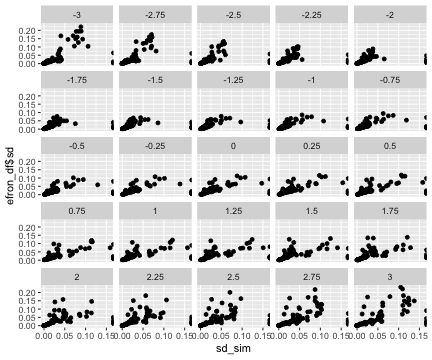

RObject{VecSxp}


In [89]:
R"ggplot(efron_df, aes(x=sd_sim, y=efron_df$sd)) + facet_wrap(~as.factor(x)) + geom_point()"

In [108]:
R"""
summ_df2 <- ungroup(summ_df) %>% filter(setting_idx <= 4, dof %in% c(0,11))
"""

RObject{VecSxp}
# A tibble: 202 x 13
   setting_idx method   dof     x true_theta     n coverage ci_left ci_right
         <int> <chr>  <int> <dbl>      <dbl> <int>    <dbl>   <dbl>    <dbl>
 1           1 Calib…     0 -3         -1.56   604    0.907   -1.68    -1.49
 2           1 Calib…     0 -2.75      -1.55   604    0.899   -1.64    -1.50
 3           1 Calib…     0 -2.5       -1.54   604    0.907   -1.62    -1.49
 4           1 Calib…     0 -2.25      -1.52   604    0.912   -1.60    -1.48
 5           1 Calib…     0 -2         -1.51   604    0.907   -1.57    -1.46
 6           1 Calib…     0 -1.75      -1.49   604    0.929   -1.55    -1.44
 7           1 Calib…     0 -1.5       -1.46   604    0.911   -1.51    -1.41
 8           1 Calib…     0 -1.25      -1.41   604    0.911   -1.46    -1.35
 9           1 Calib…     0 -1         -1.33   604    0.914   -1.37    -1.25
10           1 Calib…     0 -0.75      -1.17   604    0.916   -1.22    -1.09
# ... with 192 more rows, and 4 more va

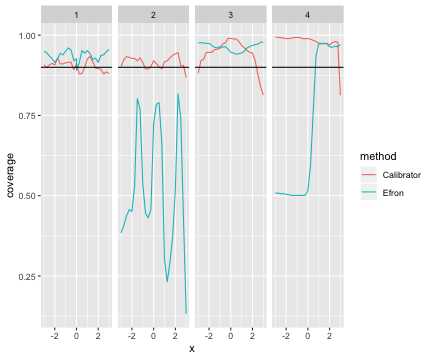

RObject{VecSxp}


In [111]:
R"""
ggplot(summ_df2, aes(x=x, y=coverage, col=method)) + geom_line()+
        facet_grid(~setting_idx) + 
        geom_hline(yintercept=0.9)  + xlim(c(-3.0,3.0))
"""

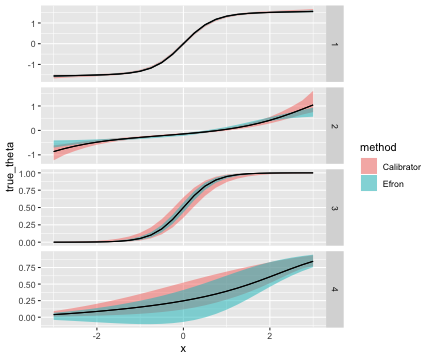

RObject{VecSxp}


In [110]:
R"""
ggplot(summ_df2, aes(x=x, ymin=ci_left,ymax=ci_right,y=true_theta, fill=method)) + 
    geom_ribbon(alpha=0.5) + facet_grid(setting_idx~., scales='free_y') + geom_line()
"""

In [53]:
R"""
further_summ_df <- ungroup(summ_df) %>%
                  group_by(setting_idx, method, dof) %>% 
                  summarize(avg_mse = mean(mse), avg_coverage=mean(coverage))   %>%
                   filter(setting_idx==8, method=='Efron') %>% 
                    arrange(dof)

"""

RObject{VecSxp}
# A tibble: 15 x 5
# Groups:   setting_idx, method [1]
   setting_idx method   dof avg_mse avg_coverage
         <int> <chr>  <int>   <dbl>        <dbl>
 1           8 Efron      1 0.0650      0       
 2           8 Efron      2 0.0157      0       
 3           8 Efron      3 0.00786     0       
 4           8 Efron      4 0.0109      0.000499
 5           8 Efron      5 0.00680     0.00107 
 6           8 Efron      6 0.00435     0.264   
 7           8 Efron      7 0.00750     0.349   
 8           8 Efron      8 0.00552     0.173   
 9           8 Efron      9 0.00627     0.377   
10           8 Efron     10 0.00559     0.173   
11           8 Efron     11 0.00712     0.346   
12           8 Efron     12 0.00731     0.208   
13           8 Efron     13 0.00848     0.259   
14           8 Efron     14 0.00848     0.198   
15           8 Efron     15 0.0210      0.222   


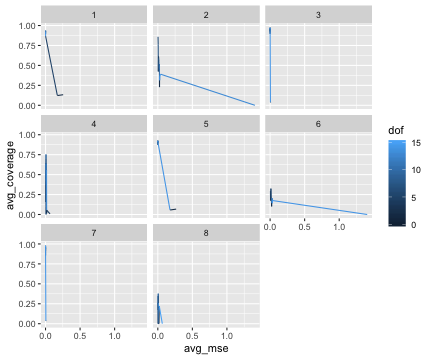

RObject{VecSxp}


In [30]:
R"""
ggplot(further_summ_df, aes(y=avg_coverage, x=avg_mse, col=dof, shape=method)) + geom_line() + facet_wrap(~setting_idx)
"""

In [14]:
true_dists = [EmpiricalBayes.easy_dist, EmpiricalBayes.hard_dist]

xs = collect(-3.0:0.25:3.0)
minimax_σs = [0.2]
ms = [10_000; 40_000]
targets =[ [PosteriorTarget(PosteriorMeanNumerator(x)) for x in xs],
           [PosteriorTarget(LFSRNumerator(x)) for x in xs]]
combs = []

for (true_dist, target, σ, m) in IterTools.product(true_dists, targets, minimax_σs, ms)
    push!(combs, Dict(:dist=>true_dist, :target=>target, :σ=>σ, :m=>m ))
end

┌ Warning: `product(xss...)` is deprecated, use `Iterators.product(xss...)` instead.
│   caller = top-level scope at In[14]:9
└ @ Core ./In[14]:9


In [15]:
marginal_grid = collect(linspace(-6,6,1001));
prior_grid = collect(linspace(-3,3,121));
marginal_h = marginal_grid[2]-marginal_grid[1];

true_dists = [EmpiricalBayes.easy_dist, EmpiricalBayes.hard_dist]
d_trues = [NormalConvolutionProblem(d, marginal_grid) for d in true_dists]

┌ Warning: `linspace(start, stop, length::Integer)` is deprecated, use `range(start, stop=stop, length=length)` instead.
│   caller = top-level scope at In[15]:1
└ @ Core In[15]:1
┌ Warning: `linspace(start, stop, length::Integer)` is deprecated, use `range(start, stop=stop, length=length)` instead.
│   caller = top-level scope at In[15]:2
└ @ Core In[15]:2
┌ Warning: `binary_maxheap(::Type{T}) where T` is deprecated, use `BinaryMaxHeap{T}()` instead.
│   caller = hcubature_(::Function, ::StaticArrays.SArray{Tuple{2},Float64,1,2}, ::StaticArrays.SArray{Tuple{2},Float64,1,2}, ::typeof(LinearAlgebra.norm), ::Float64, ::Int64, ::Int64, ::Int64) at HCubature.jl:64
└ @ HCubature /Users/ignatiad/.julia/packages/HCubature/BNvCh/src/HCubature.jl:64


2-element Array{NormalConvolutionProblem,1}:
 NormalConvolutionProblem(MixtureModel{Normal{Float64}}(K = 2)
components[1] (prior = 0.5000): Normal{Float64}(μ=-1.5, σ=0.2)
components[2] (prior = 0.5000): Normal{Float64}(μ=1.5, σ=0.2)
, [1.38831e-7, 1.4622e-7, 1.5398e-7, 1.6213e-7, 1.70688e-7, 1.79673e-7, 1.89104e-7, 1.99003e-7, 2.09391e-7, 2.20291e-7  …  2.20291e-7, 2.09391e-7, 1.99003e-7, 1.89104e-7, 1.79673e-7, 1.70688e-7, 1.6213e-7, 1.5398e-7, 1.4622e-7, 1.38831e-7], [-6.0, -5.988, -5.976, -5.964, -5.952, -5.94, -5.928, -5.916, -5.904, -5.892  …  5.892, 5.904, 5.916, 5.928, 5.94, 5.952, 5.964, 5.976, 5.988, 6.0], 0.011999999999999567)     
 NormalConvolutionProblem(MixtureModel{Normal{Float64}}(K = 2)
components[1] (prior = 0.7000): Normal{Float64}(μ=-0.2, σ=0.2)
components[2] (prior = 0.3000): Normal{Float64}(μ=0.0, σ=0.9)
, [5.15324e-8, 5.36304e-8, 5.58096e-8, 5.80729e-8, 6.04235e-8, 6.28645e-8, 6.53993e-8, 6.80311e-8, 7.07635e-8, 7.36002e-8  …  7.30939e-8, 7.02892e-8, 6.75867e-8, 

In [42]:
mycols =["#424395" "#EB549A" "#5EC2DA" "#EBC915" "#018AC4"  "#550133"]
xs_grid = range(-3,stop=3;length=1000)

-3.0:0.006006006006006006:3.0

In [15]:
# i = 1 plot


In [156]:
calib_df

,setting_idx,method,dof,x,true_theta,n,coverage,ci_left,ci_right,mean_est,bias,sd,mse
,Int64,String,Int64,Float64,Float64,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,1,Calibrator,0,-3.0,-1.55719,604,0.907285,-1.67564,-1.49256,-1.5841,-0.0269089,0.0484963,0.00307598
2,1,Calibrator,0,-2.75,-1.54704,604,0.899007,-1.64403,-1.49616,-1.5701,-0.0230546,0.0379639,0.00197277
3,1,Calibrator,0,-2.5,-1.53633,604,0.907285,-1.61898,-1.49121,-1.55509,-0.0187588,0.0331287,0.0014494
4,1,Calibrator,0,-2.25,-1.52447,604,0.912252,-1.59562,-1.48046,-1.53804,-0.0135669,0.0309902,0.00114445
5,1,Calibrator,0,-2.0,-1.51025,604,0.907285,-1.5715,-1.46455,-1.51803,-0.00777573,0.0295686,0.000934761
6,1,Calibrator,0,-1.75,-1.49121,604,0.928808,-1.54531,-1.44211,-1.49371,-0.0025012,0.0289721,0.000845641
7,1,Calibrator,0,-1.5,-1.4624,604,0.910596,-1.51154,-1.40799,-1.45976,0.00263236,0.0288887,0.000841485
8,1,Calibrator,0,-1.25,-1.41409,604,0.910596,-1.45955,-1.35114,-1.40535,0.00874617,0.0289103,0.000912301
9,1,Calibrator,0,-1.0,-1.32812,604,0.913907,-1.37179,-1.25447,-1.31313,0.0149889,0.0299816,0.00112356


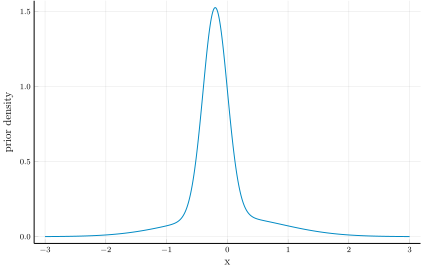

In [43]:
upscale = 0.8#8 #8x upscaling in resolution
default(size=(1000*upscale,600*upscale)) 

┌ Info: it is surprising that this function is called - please report a use case as a Plots issue
└ @ Plots /Users/ignatiad/.julia/packages/Plots/ex9On/src/args.jl:1525


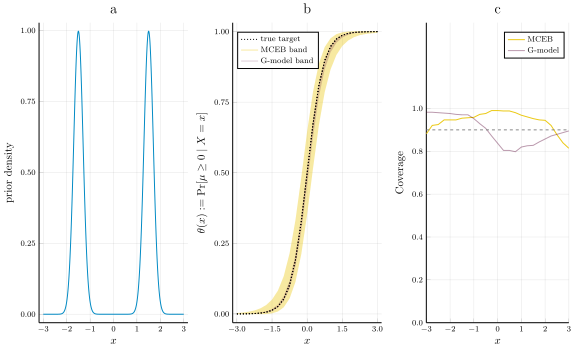

In [44]:
idx = 3
calib_df = @from i in summ_df begin
    @where i.setting_idx == idx && i.dof==0
    @select i
    @collect DataFrame
end
efron_df = @from i in summ_df begin
    @where i.setting_idx == idx && i.dof==5
    @select i
    @collect DataFrame
end;

p1 = plot(xs_grid, pdf.(combs[idx][:dist], xs_grid), color=mycols[5],
           label=:nothing, xlabel=L"x", ylabel="prior density")

p2 = plot(xs, [calib_df[:true_theta] calib_df[:true_theta]],
          fillrange=[calib_df[:ci_left] calib_df[:ci_right]], fillalpha=0.4, fillcolor=mycols[4],
          color=["black" "black"], label="",
          line=([:dot :dot]),
          xticks=([-3.0;-1.5; 0.0; 1.5; 3.0]),
          ylabel=pretty_label(combs[idx][:target][1]),
          xlabel=L"x")
plot!(p2, xs, [efron_df[:mean_est] efron_df[:mean_est]],
          fillrange=[efron_df[:ci_left] efron_df[:ci_right]], fillalpha=0.2, fillcolor=mycols[6],
          label="", alpha=0.0,
          color=[mycols[5] mycols[5]],
          line=([:solid :solid]),
          xticks=([-3.0;-1.5; 0.0; 1.5; 3.0]))

plot!(p2, xs, [calib_df[:true_theta]],
              color=["black"],
              label=["true target"], legend=:topleft, linestyle=[:dot])

plot!(p2, [0.0], [0.0], alpha=0.4, color=mycols[4], label="MCEB band" )
plot!(p2, [0.0],[0.0], alpha=0.2,color=mycols[6], label="G-model band")
#plot!(p4, xs, efron_df[:ci_left], alpha=0.0, color=mycols[6], label="Efron g band" )

p3 = plot(xs, [calib_df[:coverage] efron_df[:coverage]],
       xlabel=L"x",ylabel="Coverage", xlim=(-3,3), label=["MCEB" "G-model"],
       color=[mycols[4] mycols[6]], alpha=[1.0 0.4], ylim=(0,1.4),
       yticks=[0;0.2;0.4;0.6;0.8;1.0]  )
plot!(p3, range(-3.5,stop=3.5, length=2), repeat([0.9],2), color="grey",
       linestyle=:dash, label="", legend=:topright)


p1_easy_lfsr = p1
p2_easy_lfsr = p2
p3_easy_lfsr = p3
l = @layout grid(1,3)
plot(p1, p2, p3, layout=l,  title = [('a':'z')[i] for j = 1:1, i=1:3] )

┌ Info: it is surprising that this function is called - please report a use case as a Plots issue
└ @ Plots /Users/ignatiad/.julia/packages/Plots/ex9On/src/args.jl:1525


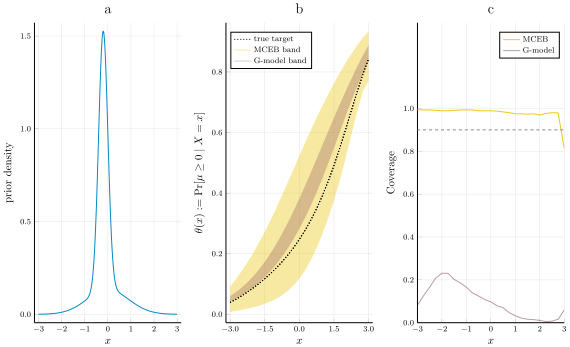

In [45]:
idx = 4
calib_df = @from i in summ_df begin
    @where i.setting_idx == idx && i.dof==0
    @select i
    @collect DataFrame
end
efron_df = @from i in summ_df begin
    @where i.setting_idx == idx && i.dof==5
    @select i
    @collect DataFrame
end;

p1 = plot(xs_grid, pdf.(combs[idx][:dist], xs_grid), color=mycols[5],
           label=:nothing, xlabel=L"x", ylabel="prior density")

p2 = plot(xs, [calib_df[:true_theta] calib_df[:true_theta]],
          fillrange=[calib_df[:ci_left] calib_df[:ci_right]], fillalpha=0.4, fillcolor=mycols[4],
          color=["black" "black"], label="",
          line=([:dot :dot]),
          xticks=([-3.0;-1.5; 0.0; 1.5; 3.0]),
          ylabel=pretty_label(combs[idx][:target][1]),
          xlabel=L"x")
plot!(p2, xs, [efron_df[:mean_est] efron_df[:mean_est]],
          fillrange=[efron_df[:ci_left] efron_df[:ci_right]], fillalpha=0.2, fillcolor=mycols[6],
          label="", alpha=0.0,
          color=[mycols[5] mycols[5]],
          line=([:solid :solid]),
          xticks=([-3.0;-1.5; 0.0; 1.5; 3.0]))

plot!(p2, xs, [calib_df[:true_theta]],
              color=["black"],
              label=["true target"], legend=:topleft, linestyle=[:dot])

plot!(p2, [0.0], [0.0], alpha=0.4, color=mycols[4], label="MCEB band" )
plot!(p2, [0.0],[0.0], alpha=0.2,color=mycols[6], label="G-model band")
#plot!(p4, xs, efron_df[:ci_left], alpha=0.0, color=mycols[6], label="Efron g band" )

p3 = plot(xs, [calib_df[:coverage] efron_df[:coverage]],
       xlabel=L"x",ylabel="Coverage", xlim=(-3,3), label=["MCEB" "G-model"],
       color=[mycols[4] mycols[6]], alpha=[1.0 0.4], ylim=(0,1.4),
       yticks=[0;0.2;0.4;0.6;0.8;1.0]  )
plot!(p3, range(-3.5,stop=3.5, length=2), repeat([0.9],2), color="grey",
       linestyle=:dash, label="", legend=:topright)



p1_hard_lfsr = p1
p2_hard_lfsr = p2
p3_hard_lfsr = p3
l = @layout grid(1,3)
plot(p1, p2, p3, layout=l,  title = [('a':'z')[i] for j = 1:1, i=1:3] )

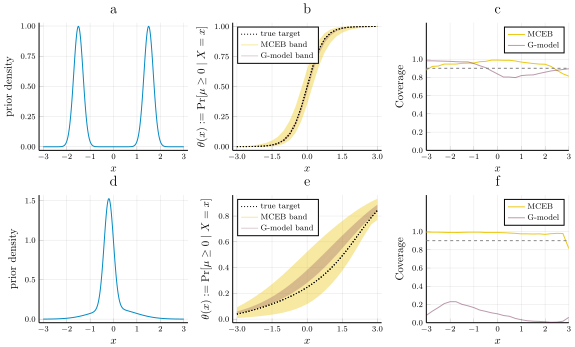

In [46]:
l = @layout grid(2,3)
p_lfsr = plot(p1_easy_lfsr, p2_easy_lfsr, p3_easy_lfsr,
    p1_hard_lfsr, p2_hard_lfsr, p3_hard_lfsr, layout=l,  title = [('a':'z')[i] for j = 1:1, i=1:6] )
p_lfsr

In [47]:
savefig("lfsr_simulation.pdf")

┌ Info: it is surprising that this function is called - please report a use case as a Plots issue
└ @ Plots /Users/ignatiad/.julia/packages/Plots/ex9On/src/args.jl:1525


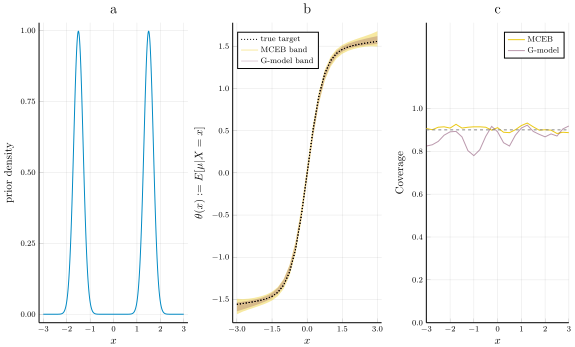

In [48]:
idx = 1
calib_df = @from i in summ_df begin
    @where i.setting_idx == idx && i.dof==0
    @select i
    @collect DataFrame
end
efron_df = @from i in summ_df begin
    @where i.setting_idx == idx && i.dof==5
    @select i
    @collect DataFrame
end;

p1 = plot(xs_grid, pdf.(combs[idx][:dist], xs_grid), color=mycols[5],
           label=:nothing, xlabel=L"x", ylabel="prior density")

p2 = plot(xs, [calib_df[:true_theta] calib_df[:true_theta]],
          fillrange=[calib_df[:ci_left] calib_df[:ci_right]], fillalpha=0.4, fillcolor=mycols[4],
          color=["black" "black"], label="",
          line=([:dot :dot]),
          xticks=([-3.0;-1.5; 0.0; 1.5; 3.0]),
          ylabel=pretty_label(combs[idx][:target][1]),
          xlabel=L"x")
plot!(p2, xs, [efron_df[:mean_est] efron_df[:mean_est]],
          fillrange=[efron_df[:ci_left] efron_df[:ci_right]], fillalpha=0.2, fillcolor=mycols[6],
          label="", alpha=0.0,
          color=[mycols[5] mycols[5]],
          line=([:solid :solid]),
          xticks=([-3.0;-1.5; 0.0; 1.5; 3.0]))

plot!(p2, xs, [calib_df[:true_theta]],
              color=["black"],
              label=["true target"], legend=:topleft, linestyle=[:dot])

plot!(p2, [0.0], [0.0], alpha=0.4, color=mycols[4], label="MCEB band" )
plot!(p2, [0.0],[0.0], alpha=0.2,color=mycols[6], label="G-model band")
#plot!(p4, xs, efron_df[:ci_left], alpha=0.0, color=mycols[6], label="Efron g band" )

p3 = plot(xs, [calib_df[:coverage] efron_df[:coverage]],
       xlabel=L"x",ylabel="Coverage", xlim=(-3,3), label=["MCEB" "G-model"],
       color=[mycols[4] mycols[6]], alpha=[1.0 0.4], ylim=(0,1.4),
       yticks=[0;0.2;0.4;0.6;0.8;1.0]  )
plot!(p3, range(-3.5,stop=3.5, length=2), repeat([0.9],2), color="grey",
       linestyle=:dash, label="", legend=:topright)


p1_easy_lfsr = p1
p2_easy_lfsr = p2
p3_easy_lfsr = p3
l = @layout grid(1,3)
plot(p1, p2, p3, layout=l,  title = [('a':'z')[i] for j = 1:1, i=1:3] )

┌ Info: it is surprising that this function is called - please report a use case as a Plots issue
└ @ Plots /Users/ignatiad/.julia/packages/Plots/ex9On/src/args.jl:1525


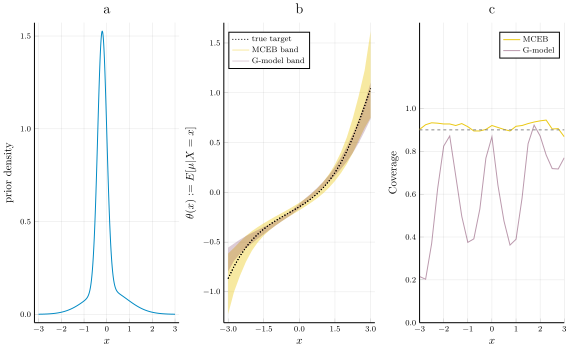

In [49]:
idx = 2
calib_df = @from i in summ_df begin
    @where i.setting_idx == idx && i.dof==0
    @select i
    @collect DataFrame
end
efron_df = @from i in summ_df begin
    @where i.setting_idx == idx && i.dof==5
    @select i
    @collect DataFrame
end;

p1 = plot(xs_grid, pdf.(combs[idx][:dist], xs_grid), color=mycols[5],
           label=:nothing, xlabel=L"x", ylabel="prior density")

p2 = plot(xs, [calib_df[:true_theta] calib_df[:true_theta]],
          fillrange=[calib_df[:ci_left] calib_df[:ci_right]], fillalpha=0.4, fillcolor=mycols[4],
          color=["black" "black"], label="",
          line=([:dot :dot]),
          xticks=([-3.0;-1.5; 0.0; 1.5; 3.0]),
          ylabel=pretty_label(combs[idx][:target][1]),
          xlabel=L"x")
plot!(p2, xs, [efron_df[:mean_est] efron_df[:mean_est]],
          fillrange=[efron_df[:ci_left] efron_df[:ci_right]], fillalpha=0.2, fillcolor=mycols[6],
          label="", alpha=0.0,
          color=[mycols[5] mycols[5]],
          line=([:solid :solid]),
          xticks=([-3.0;-1.5; 0.0; 1.5; 3.0]))

plot!(p2, xs, [calib_df[:true_theta]],
              color=["black"],
              label=["true target"], legend=:topleft, linestyle=[:dot])

plot!(p2, [0.0], [0.0], alpha=0.4, color=mycols[4], label="MCEB band" )
plot!(p2, [0.0],[0.0], alpha=0.2,color=mycols[6], label="G-model band")
#plot!(p4, xs, efron_df[:ci_left], alpha=0.0, color=mycols[6], label="Efron g band" )

p3 = plot(xs, [calib_df[:coverage] efron_df[:coverage]],
       xlabel=L"x",ylabel="Coverage", xlim=(-3,3), label=["MCEB" "G-model"],
       color=[mycols[4] mycols[6]], alpha=[1.0 0.4], ylim=(0,1.4),
       yticks=[0;0.2;0.4;0.6;0.8;1.0]  )
plot!(p3, range(-3.5,stop=3.5, length=2), repeat([0.9],2), color="grey",
       linestyle=:dash, label="", legend=:topright)



p1_hard_lfsr = p1
p2_hard_lfsr = p2
p3_hard_lfsr = p3
l = @layout grid(1,3)
plot(p1, p2, p3, layout=l,  title = [('a':'z')[i] for j = 1:1, i=1:3] )

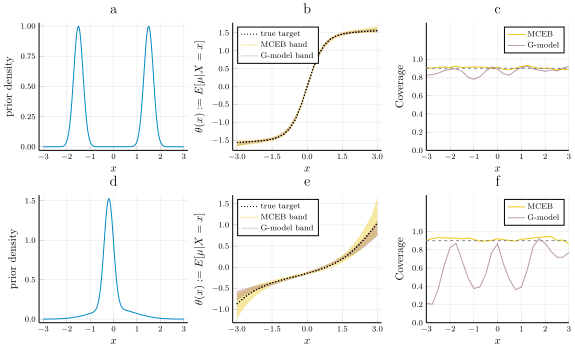

In [50]:
l = @layout grid(2,3)
p_posterior_mean = plot(p1_easy_lfsr, p2_easy_lfsr, p3_easy_lfsr,
    p1_hard_lfsr, p2_hard_lfsr, p3_hard_lfsr, layout=l,  title = [('a':'z')[i] for j = 1:1, i=1:6] )
p_posterior_mean

In [51]:
savefig("posterior_mean_simulation.pdf")

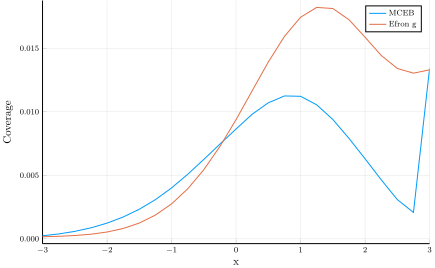

In [41]:
p4 = plot(xs, [calib_df[:mse] efron_df[:mse]], label=["MCEB", "Efron g"],
       xlabel="x",ylabel="Coverage", xlim=(-3,3))

In [52]:
summ_df

,setting_idx,method,dof,x,true_theta,n,coverage,ci_left,ci_right,mean_est,bias,sd,mse
,Int64,String,Int64,Float64,Float64,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,1,Calibrator,0,-3.0,-1.55719,513,0.906433,-1.67449,-1.49147,-1.58298,-0.0257894,0.0484891,0.00301628
2,1,Calibrator,0,-2.75,-1.54704,513,0.900585,-1.64315,-1.49525,-1.5692,-0.0221617,0.0380337,0.00193771
3,1,Calibrator,0,-2.5,-1.53633,513,0.912281,-1.6184,-1.4905,-1.55445,-0.0181128,0.033163,0.00142786
4,1,Calibrator,0,-2.25,-1.52447,513,0.91423,-1.5952,-1.47985,-1.53753,-0.0130525,0.0310668,0.00113551
5,1,Calibrator,0,-2.0,-1.51025,513,0.908382,-1.57132,-1.46416,-1.51774,-0.00748729,0.0297298,0.000939918
6,1,Calibrator,0,-1.75,-1.49121,513,0.925926,-1.54543,-1.44201,-1.49372,-0.00251302,0.0290744,0.000851634
7,1,Calibrator,0,-1.5,-1.4624,513,0.908382,-1.51197,-1.40814,-1.46006,0.0023407,0.0290289,0.000848155
8,1,Calibrator,0,-1.25,-1.41409,513,0.912281,-1.46034,-1.35155,-1.40595,0.00814715,0.0291346,0.000915202
9,1,Calibrator,0,-1.0,-1.32812,513,0.91423,-1.37279,-1.25496,-1.31387,0.0142456,0.0302273,0.00111663


┌ Warning: `product(xss...)` is deprecated, use `Iterators.product(xss...)` instead.
│   caller = top-level scope at In[55]:2
└ @ Core ./In[55]:2


In [5]:
marginal_grid = collect(range(-6,stop=6,length=1001));

In [47]:
#1,3 easy onesfor setting_idx=1:n_settings
sim_length_vec = Int64[]
for setting_idx=1:n_settings
    res_list = readdir("sim_res/base_sim_Jan10_v2");
    res_list = res_list[occursin.(set_idx[setting_idx], res_list)]
    push!(sim_length_vec, length(res_list))
end    

In [49]:
sim_length_vec

8-element Array{Int64,1}:
 513
 552
 505
 555
 520
 559
 513
 561

In [50]:
cut(512,4)

MethodError: MethodError: no method matching cut(::Int64, ::Int64)
Closest candidates are:
  cut(!Matched::AbstractArray, ::Integer; labels) at /Users/ignatiad/.julia/packages/CategoricalArrays/ucKV2/src/extras.jl:131

In [25]:
@rput my_df
R"saveRDS(my_df, 'mydf1.Rds')"

RObject{NilSxp}
NULL


In [44]:
R"library(tidyverse)"
R"""
summ_df <- group_by(my_df, setting_idx, method, x, true_theta) %>%
           summarize(n=n(),coverage = mean( (true_theta >= ci_left) & (true_theta <= ci_right)),
                     ci_left = mean(ci_left),
                     ci_right = mean(ci_right), mean_est = mean(est), 
                     )

"""

RObject{VecSxp}
# A tibble: 26 x 9
# Groups:   setting_idx, method, x [?]
   setting_idx method     x true_theta     n coverage ci_left ci_right mean_est
         <int> <chr>  <dbl>      <dbl> <int>    <dbl>   <dbl>    <dbl>    <dbl>
 1           1 Calib…  -3    -1.56e+ 0   114    0.912 -1.67    -1.49   -1.58   
 2           1 Calib…  -2.5  -1.54e+ 0   114    0.904 -1.62    -1.49   -1.55   
 3           1 Calib…  -2    -1.51e+ 0   114    0.904 -1.57    -1.46   -1.52   
 4           1 Calib…  -1.5  -1.46e+ 0   114    0.930 -1.51    -1.41   -1.46   
 5           1 Calib…  -1    -1.33e+ 0   114    0.930 -1.37    -1.25   -1.31   
 6           1 Calib…  -0.5  -9.10e- 1   114    0.930 -0.967   -0.819  -0.893  
 7           1 Calib…   0    -2.97e-15   113    0.912 -0.0887   0.0799 -0.00441
 8           1 Calib…   0.5   9.10e- 1   113    0.929  0.817    0.966   0.891  
 9           1 Calib…   1     1.33e+ 0   113    0.965  1.26     1.38    1.32   
10           1 Calib…   1.5   1.46e+ 0   113  

In [12]:
@rput my_df
R"saveRDS(my_df, 'mydf_full2.Rds')"

Plots.GRBackend()

In [ ]:
R"""
ggplot(summ_df, aes(x=x, ymin=ci_left,ymax=ci_right,y=true_theta, fill=method)) + 
    geom_ribbon(alpha=0.5) + facet_wrap(~setting_idx) + geom_line()
"""

In [ ]:
R"""
ggplot(summ_df, aes(x=x, y=coverage, col=method)) + 
    geom_line() + facet_wrap(~setting_idx)
"""

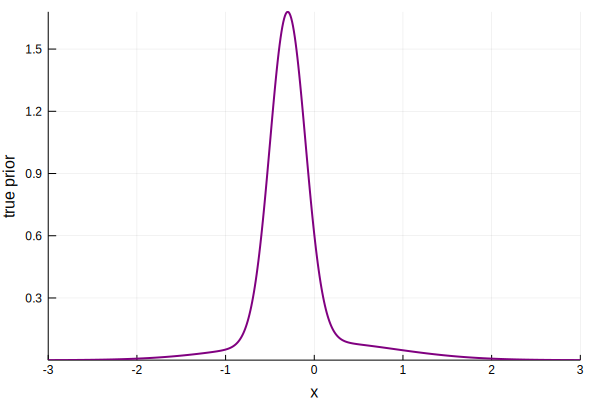

In [22]:
xs = collect(-3:0.01:3)
g_true = pdf.(true_dist, xs)
p1 = plot(xs, g_true, legend=:none,  linewidth=2, color=:purple, xlabel="x",ylabel="true prior")

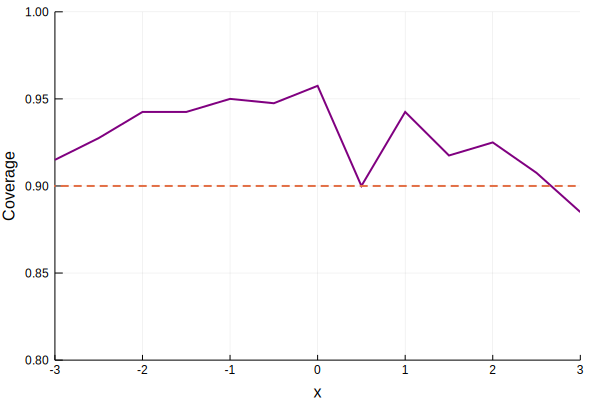

In [20]:
p2 = @df res_df_tmp plot(:x, :coverage, legend=:none, ylim=(0.8,1.0), linewidth=2, color=:purple,
       xlabel="x",ylabel="Coverage")
hline!(p2, [0.9], linestyle=:dash, linewidth=2)

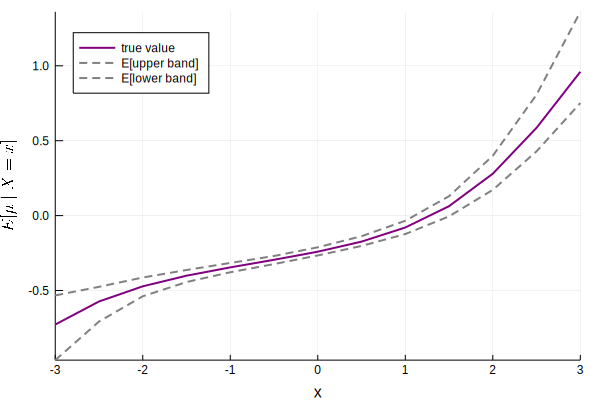

In [35]:
#true_θ = [posterior_stats(d_true,PosteriorTarget(PosteriorMeanNumerator(x)))[3] for x in xs];
p3 = @df res_df_tmp plot(:x, [:truetheta :upperband :lowerband ], 
                  linewidth=2,
                  color=:purple, xlabel="x", 
                  linestyle=[:solid :dash :dash], color=[:purple :grey :grey],
                  labels=["true value" "E[upper band]"  "E[lower band]"],
                  ylabel=L"E[ \mu \mid X=x]",
                  legend=:topleft)

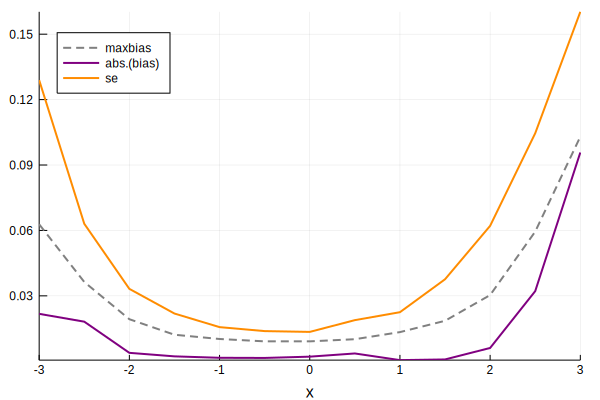

In [38]:
p4 = @df res_df_tmp plot(:x, [:maxbias abs.(:bias) :se],   linewidth=2,
          linestyle=[:dash :solid :solid], color=[:grey :purple :darkorange], legend=:topleft,
          xlabel="x")

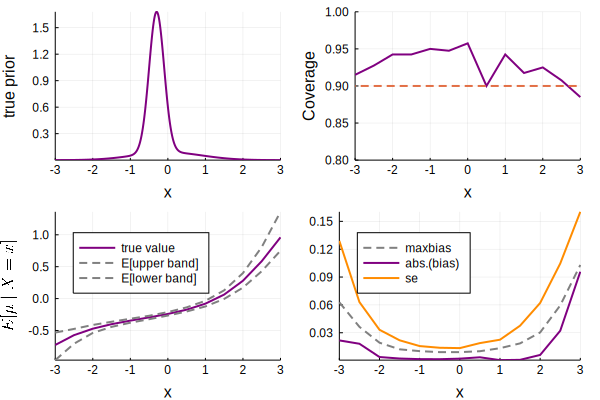

In [39]:
plot(p1,p2,p3, p4, layout=(2,2))

In [40]:
savefig("simulation_posterior_mean.pdf")